In [0]:
!curl https://raw.githubusercontent.com/PaulMercerAI/AML19/master/AML19FirstDataset.tar.gz -L | tar -xvz 

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
nodes = pd.read_csv('AML19FirstDataset/nodes.csv')

In [0]:
transactions = pd.read_csv('AML19FirstDataset/transactions.csv')

In [0]:
txBySourceNode = transactions.groupby('sourceNodeId')
txByTargetNode = transactions.groupby('targetNodeId')
inDegree = txBySourceNode.size()
outDegree = txByTargetNode.size()
inVolume = txBySourceNode['value'].sum().rename(columns={0:''})
outVolume = txByTargetNode['value'].sum().rename(columns={0:''})
dfs = [nodes, inDegree, outDegree, inVolume, outVolume]
colNames = {0: 'inDegree', 1:'outDegree', 2:'inVolume', 3:'outVolume'}


#create dataframe that is ordered by inVolume
#drop the first 18900 results 
#take each row and divide the inVolume by the max inVolume and ratio of Fraud to Non-Fraud
nodesEnriched = pd.concat(dfs, axis=1, join='inner').rename(columns=colNames)
nodesEnriched = nodesEnriched.sort_values(by=['inVolume'])
nodesEnriched.insert(loc=0, column="row", value=np.arange(len(nodesEnriched)))
nodesEnriched.drop(nodesEnriched[nodesEnriched['row']<18900].index, inplace = True)
nodesEnriched['inVolume'] = nodesEnriched['inVolume']/(70102.48*9.26)

#create dataframe that is ordered by inDegree
#drop the first 18900 results
#take each row and divide the inDegree by the max inDegree and ratio of Fraud to Non-Fraud
inTable = pd.concat(dfs, axis=1, join='inner').rename(columns=colNames)
inTable = inTable.sort_values(by=['inDegree'])
inTable.insert(loc=0, column='row', value=np.arange(len(inTable)))
inTable.drop(inTable[inTable['row']< 18900].index, inplace=True)
inTable['inDegree'] = inTable['inDegree']/(205*3.58)

#create dataframe that is ordered by outDegree
#drop the first 18900 results
#take each row and divide the outDegree by the max outDegree and ratio of Fraud to Non-Fraud
outTable = pd.concat(dfs, axis=1, join='inner').rename(columns=colNames)
outTable = outTable.sort_values(by=['outDegree'])
outTable.insert(loc=0, column='row', value=np.arange(len(outTable)))
outTable.drop(outTable[outTable['row']<18900].index, inplace = True)
outTable['outDegree'] = outTable['outDegree']/(171*2.5)


#find the standard deviation of the txBySourceNode
x=txBySourceNode.std(ddof=0)


#create dataframe that is ordered by outVolume
#drop the first 18900 results 
#take each row and divide different columns by there max values and there ratio of Fraud to Non-Fraud
volumeTable = pd.concat(dfs, axis=1, join='inner').rename(columns=colNames)
volumeTable = volumeTable.sort_values(by=['outVolume'])
volumeTable.insert(loc=0, column="row", value=np.arange(len(volumeTable)))
volumeTable.drop(volumeTable[volumeTable['row']< 18900].index, inplace = True)
volumeTable['inDegree'] = volumeTable['inDegree']/(205*3.58)
volumeTable['outDegree'] = volumeTable['outDegree']/(171*2.5)
volumeTable['inVolume'] = volumeTable['inVolume']/(70102.48*9.26)
volumeTable['outVolume'] = volumeTable['outVolume']/(50080.75*4.57) 

#create dataframe
#drop the first 18900 results
#take each row and divide different columns by there max values and there ratio of Fraud to Non-Fraud
#order the dataframe by the sum of the new values for inDegree, outDegree, inVolume and outVolume
addedTable = pd.concat(dfs, axis=1, join='inner').rename(columns=colNames)
addedTable.insert(loc=0,column='row', value=np.arange(len(addedTable)))
addedTable.drop(addedTable[addedTable['row']< 18900].index, inplace = True)
addedTable['inDegree'] = addedTable['inDegree']/(205*3.58)
addedTable['outDegree'] = addedTable['outDegree']/(171*2.5)
addedTable['inVolume'] = addedTable['inVolume']/(70102.48*9.26)
addedTable['outVolume'] = addedTable['outVolume']/(50080.75*4.57)
addedTable['sum'] = addedTable['inDegree'] + addedTable['outDegree'] + addedTable['inVolume'] + addedTable['outVolume']
addedTable = addedTable.sort_values(by=['sum'])

In [0]:

addedTable.tail()
addedTable.describe()


,row,nodeid,isFraud,init_balance,fraudStep,inDegree,outDegree,inVolume,outVolume,sum
count,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000
mean,19351.000000,19548.000000,0.118494,255.000365,5.426357,0.014564,0.047320,0.004215,0.024687,0.090787
std,260.817944,260.817944,0.323371,121.800008,25.796467,0.023345,0.040061,0.008261,0.020587,0.084123
min,18900.000000,19097.000000,0.000000,100.070000,-1.000000,0.001363,0.009357,0.000156,0.004736,0.025391
25%,19125.500000,19322.500000,0.000000,154.830000,-1.000000,0.004088,0.028070,0.001002,0.014043,0.056403
50%,19351.000000,19548.000000,0.000000,224.180000,-1.000000,0.009538,0.035088,0.002363,0.018233,0.069833
75%,19576.500000,19773.500000,0.000000,332.990000,-1.000000,0.019076,0.051462,0.004156,0.026964,0.093499
max,19802.000000,19999.000000,1.000000,598.430000,147.000000,0.279330,0.353216,0.107991,0.187715,0.900946


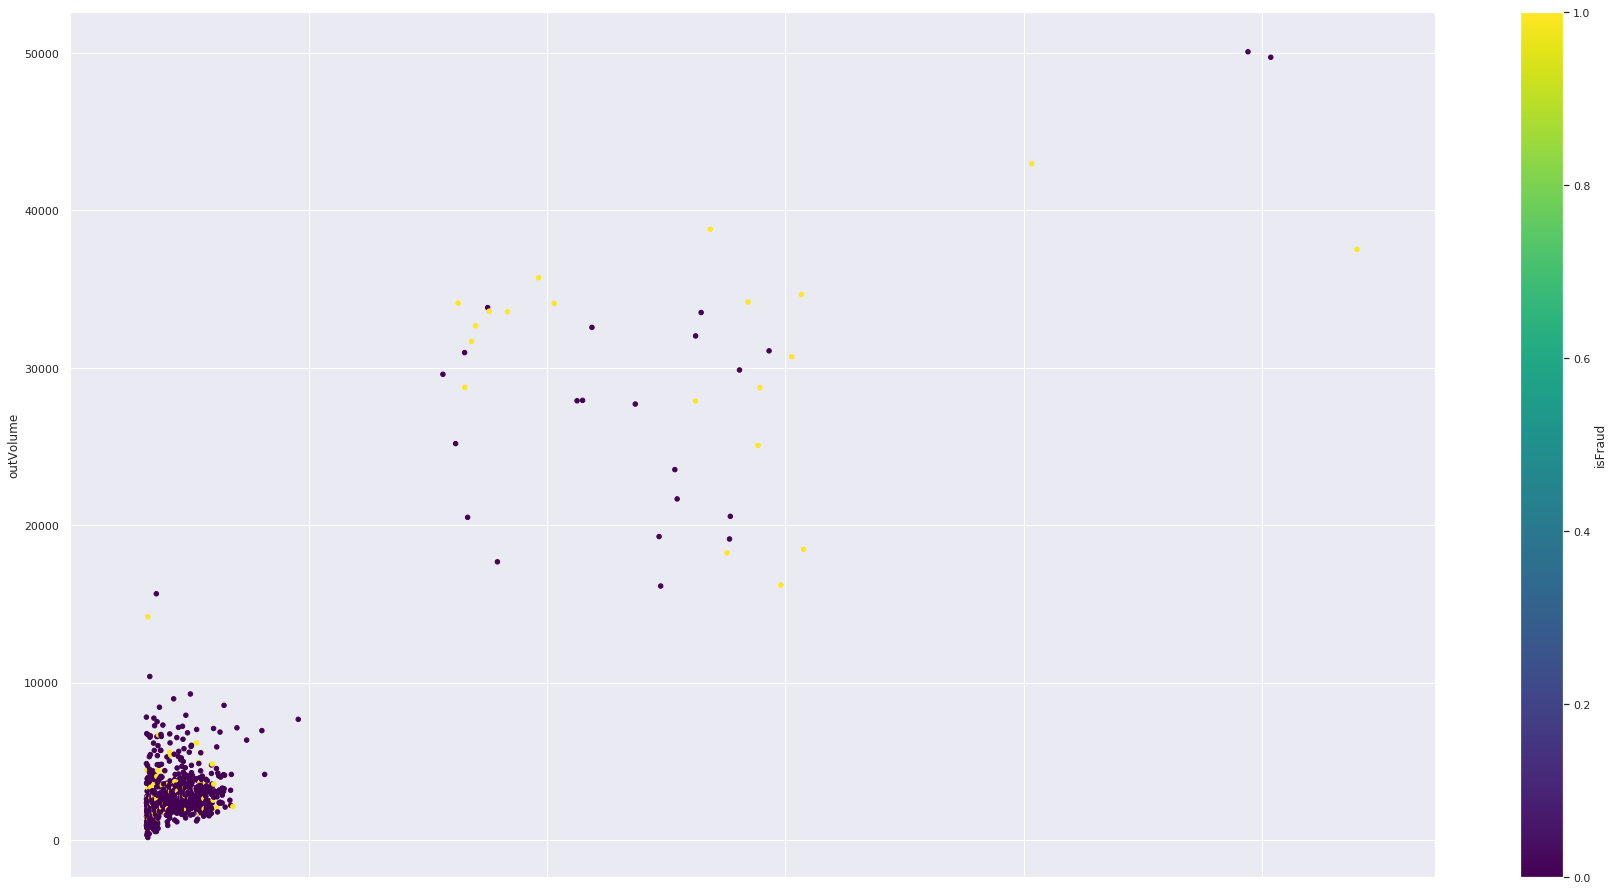

In [0]:
#create a scatterplot of inVolume against outVolume
ax1 = nodesEnriched.plot.scatter(x='inVolume', y='outVolume', c='isFraud', colormap='viridis')

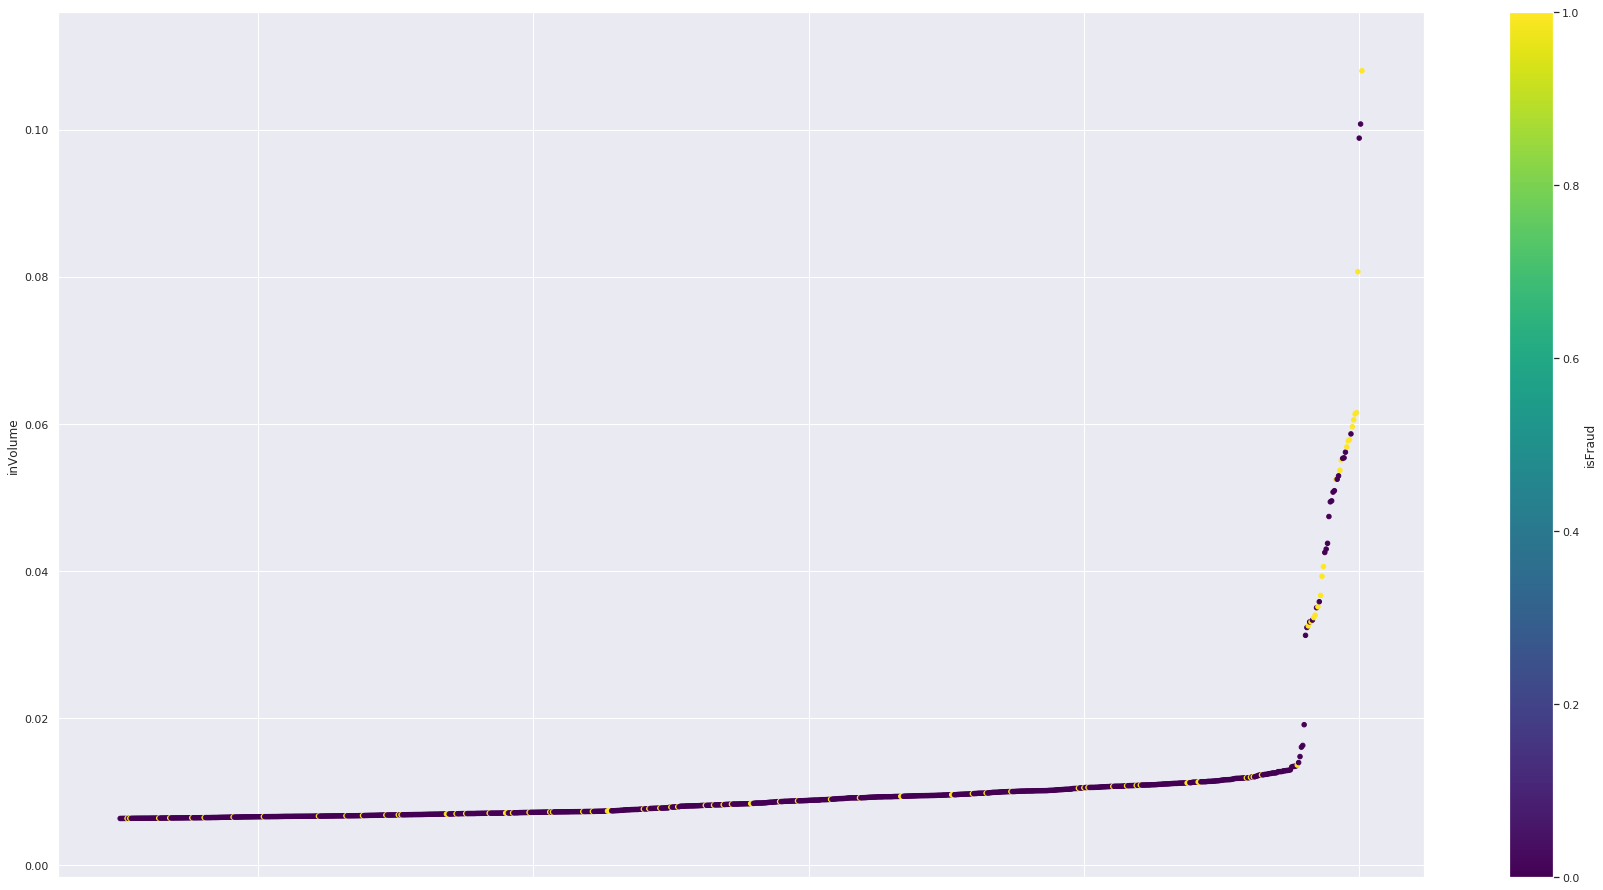

In [0]:
#create scatterplot of row number against inVolume 
#where the row number has been ordered in size of inVolume
ax2 = nodesEnriched.plot.scatter(x='row', y='inVolume', c='isFraud', colormap='viridis')

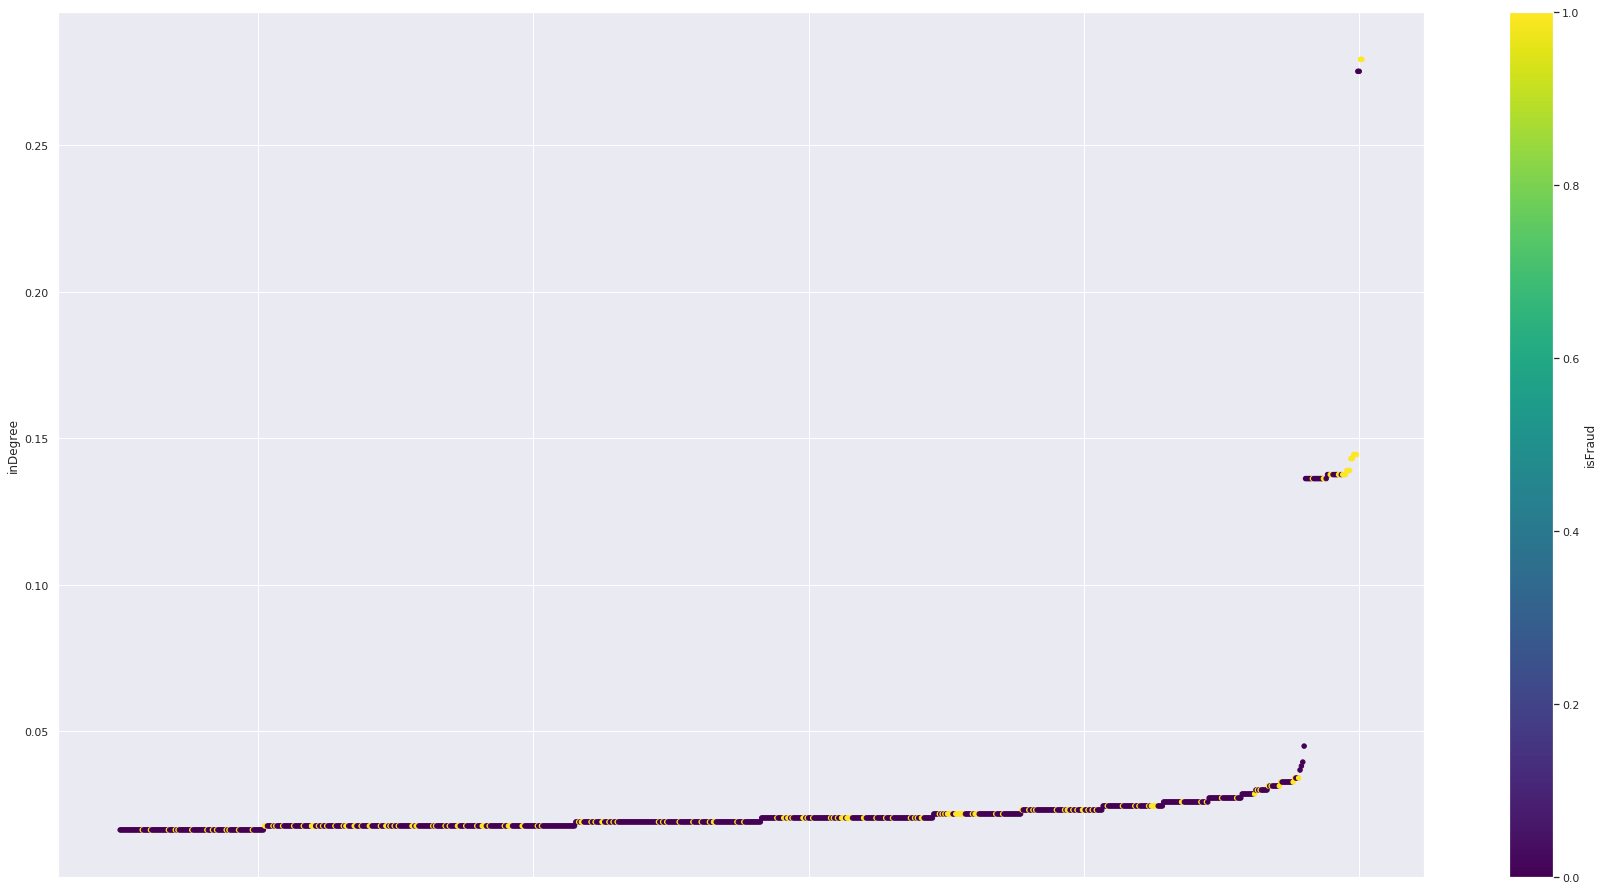

In [0]:
#create scatterplot of row number against inDegree 
#where the row number has been ordered in size of inDegree
ax3 = inTable.plot.scatter(x='row', y='inDegree', c='isFraud', colormap='viridis')

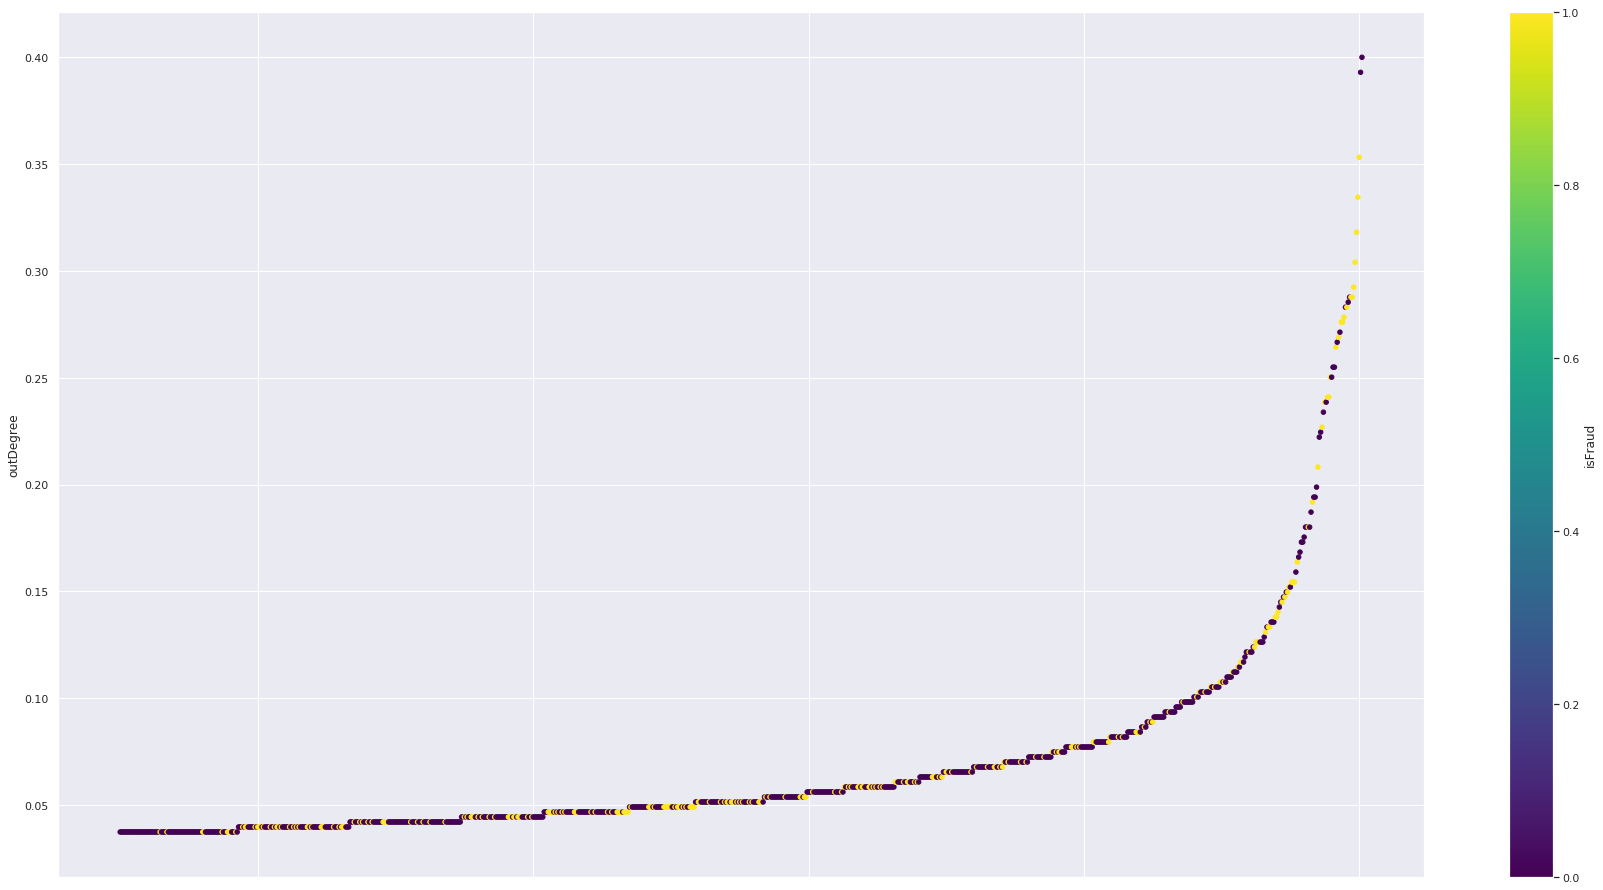

In [0]:
#create scatterplot of row number against outDegree 
#where the row number has been ordered in size of outDegree
ax4 = outTable.plot.scatter(x='row', y='outDegree', c='isFraud', colormap='viridis')

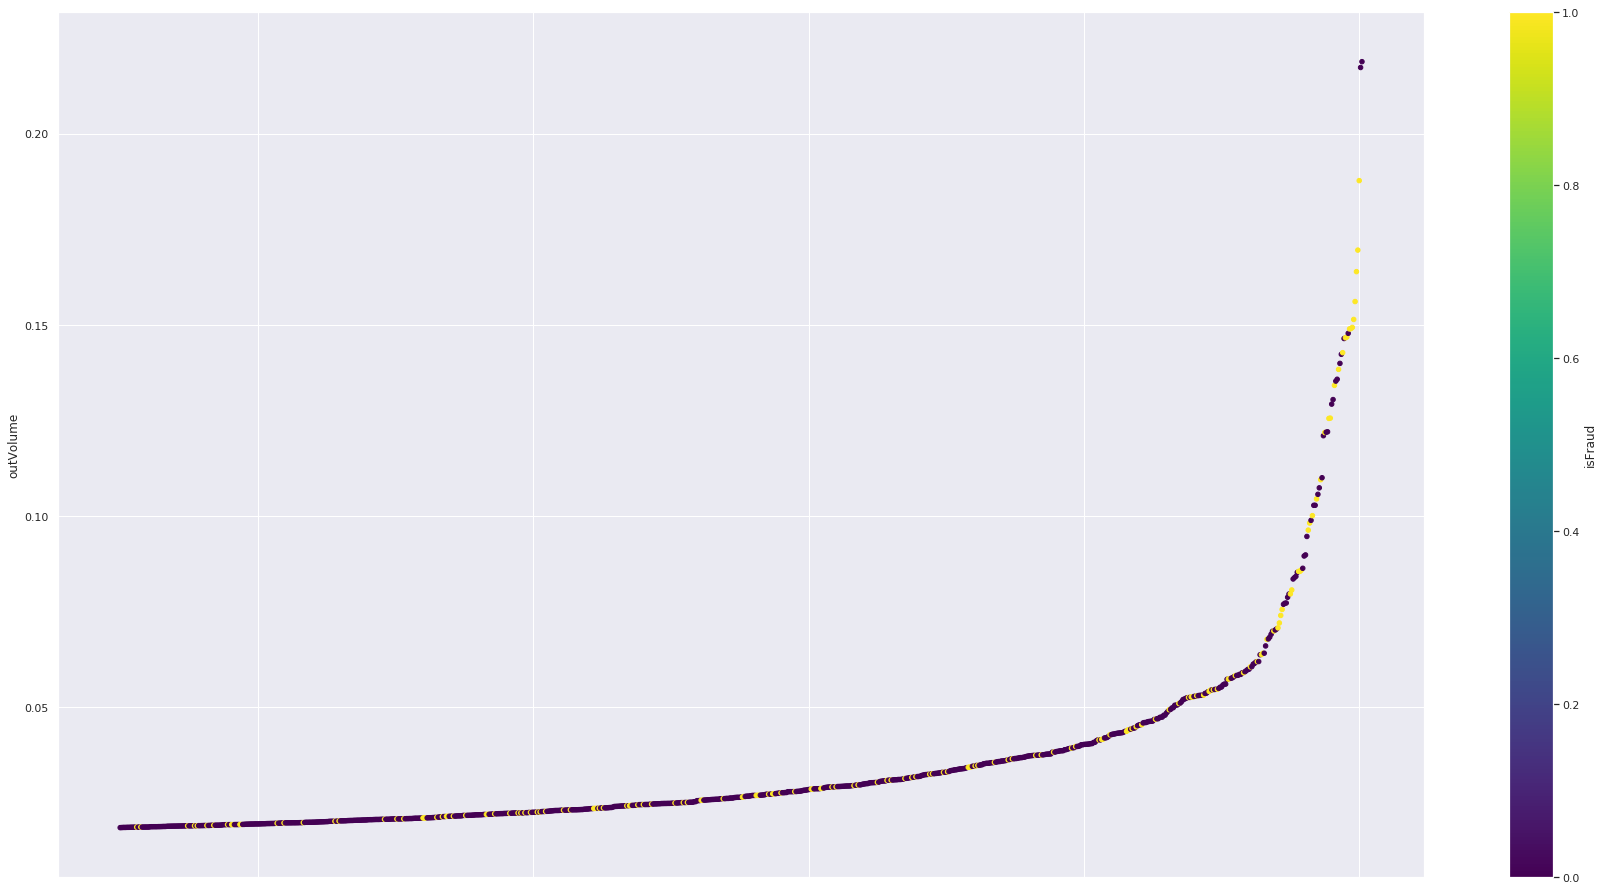

In [0]:
#create scatterplot of row number against outVolume 
#where the row number has been ordered in size of outVolume
ax5 = volumeTable.plot.scatter(x='row', y='outVolume', c='isFraud', colormap='viridis')

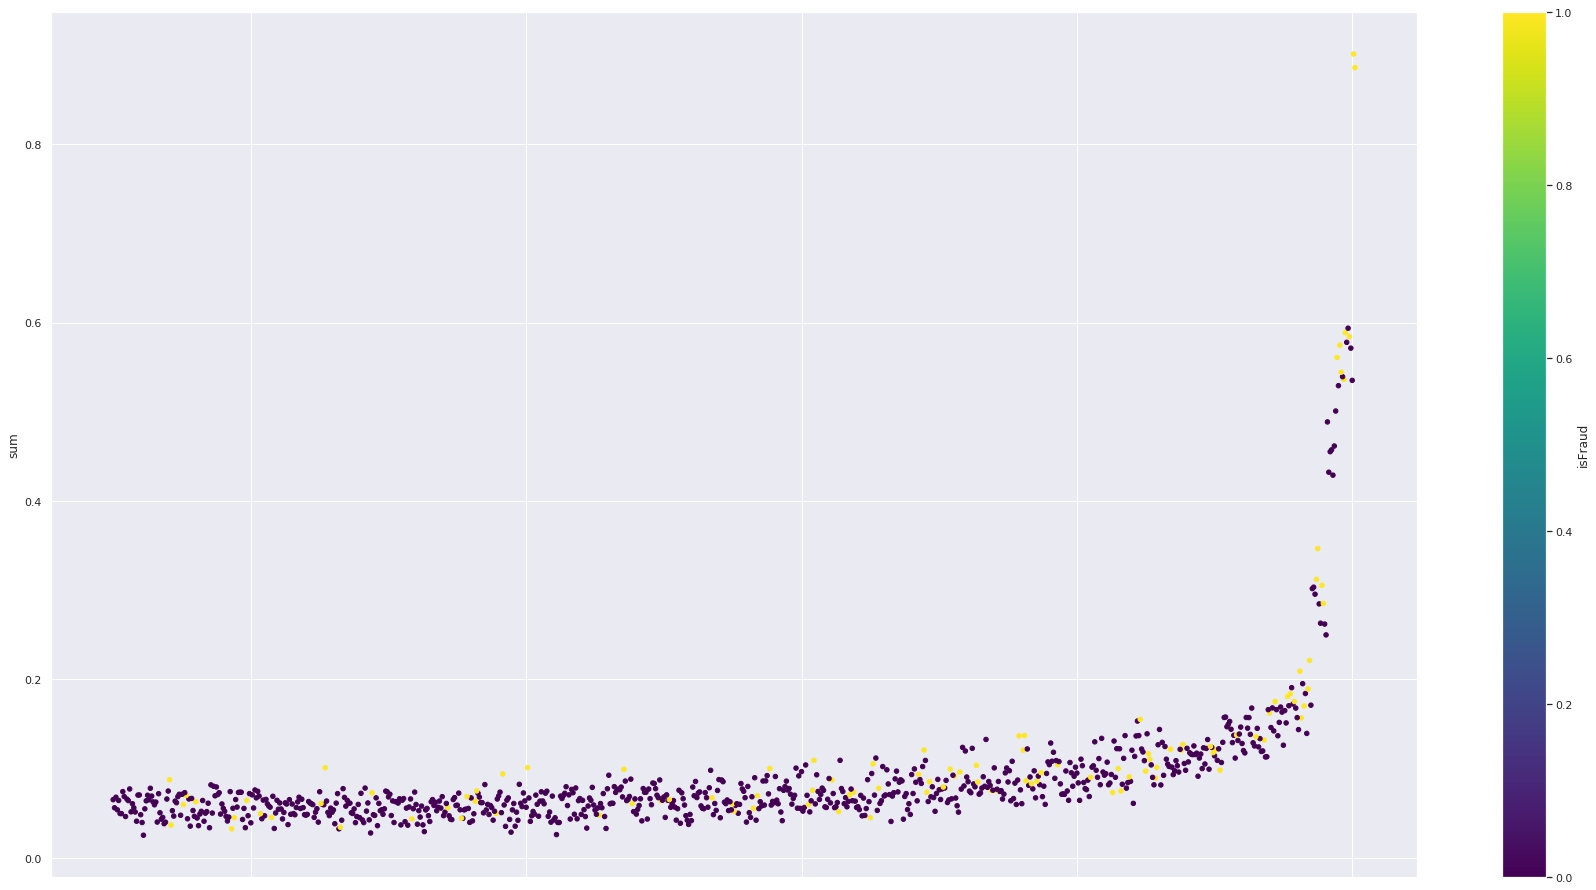

In [0]:
#create scatterplot of row number against sum of the columns 
#where the row number has been ordered in size of the sum
ax6 = addedTable.plot.scatter(x='row', y='sum', c='isFraud', colormap='viridis')

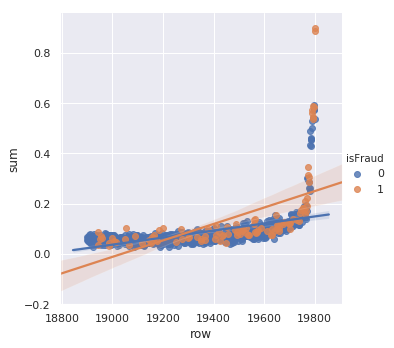

In [0]:
#create scatterplot of row number against sum of the columns 
#where the row number has been ordered in size of the sum
sns.lmplot("row", "sum", data=addedTable, hue="isFraud")


In [0]:
sns.set(rc={'figure.figsize':(30.6,15.9)})

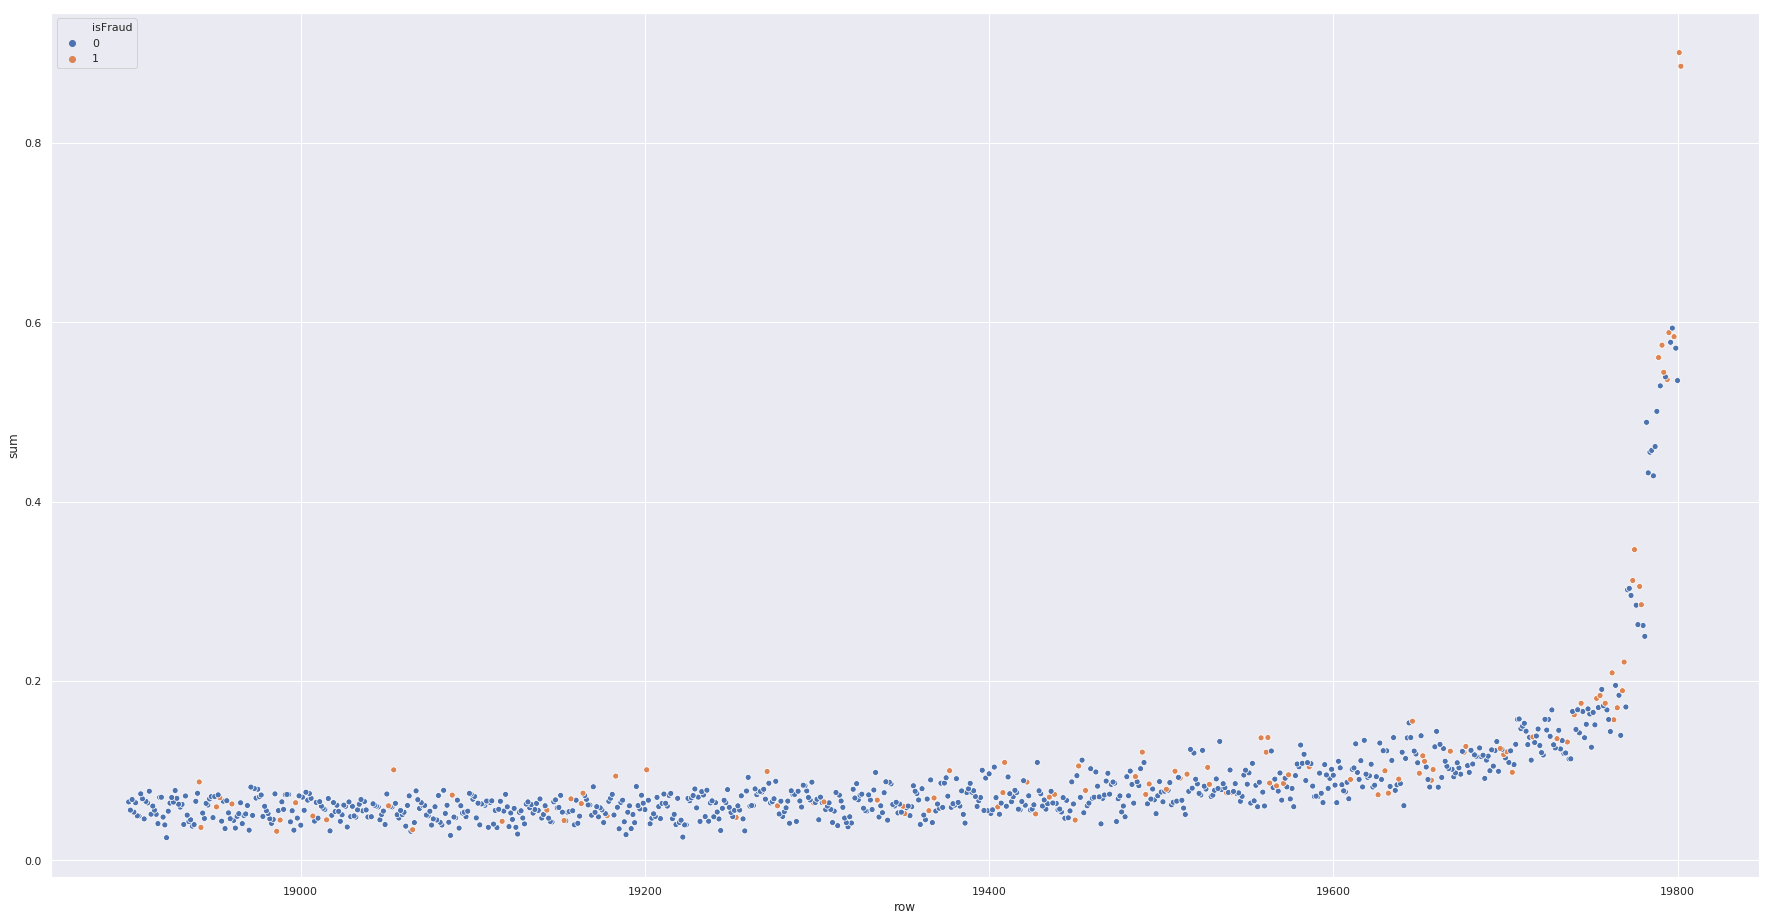

In [0]:
#create scatterplot of row number against sum of the columns 
#where the row number has been ordered in size of the sum
sns.scatterplot("row", "sum", data=addedTable, hue="isFraud", size_order=["T1","T2"])